In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [24]:
data = pd.read_csv('../data/output/full_sample.csv',index_col=[0]).dropna()
data

,XGCSWGS84,YGCSWGS84,collision,hour,hour_cos,hour_sin,month,month_cos,month_sin,segment_id,sun_elevation_angle,weekday,year
0,13.475018,52.513596,1,15,-0.576680,-0.816970,1,0.866025,5.000000e-01,6209.0,8.940090,4,2018
1,13.291022,52.587257,1,11,-0.990686,0.136167,1,0.866025,5.000000e-01,41374.0,14.868199,2,2018
2,13.291022,52.587257,1,11,-0.990686,0.136167,1,0.866025,5.000000e-01,41373.0,14.868199,2,2018
3,13.420578,52.526020,1,9,-0.775711,0.631088,1,0.866025,5.000000e-01,4410.0,5.386518,3,2018
4,13.348288,52.481846,1,17,-0.068242,-0.997669,1,0.866025,5.000000e-01,1452.0,-5.666644,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233510,13.461185,52.500866,0,4,0.460065,0.887885,12,1.000000,-2.449294e-16,20785.0,-36.130956,2,2020
233511,13.408936,52.516991,0,6,-0.068242,0.997669,12,1.000000,-2.449294e-16,7145.0,-18.064387,2,2020
233512,13.299673,52.519741,0,7,-0.334880,0.942261,12,1.000000,-2.449294e-16,2827.0,-9.561931,2,2020
233513,13.295041,52.590935,0,16,-0.334880,-0.942261,12,1.000000,-2.449294e-16,1257.0,-1.575767,2,2020


In [25]:
X=data[['year','month_sin', 'month_cos', 'weekday', 'hour_sin', 'hour_cos', 'segment_id', 'sun_elevation_angle']]  # Features

y=data['collision']  # Labels

In [39]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 70% training and 30% test

In [43]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, max_depth=18)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)



RandomForestClassifier(max_depth=18)

In [41]:
y_pred=clf.predict(X_test)

In [42]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.roc_auc_score(y_test, y_pred))

Accuracy: 0.9519443846404713


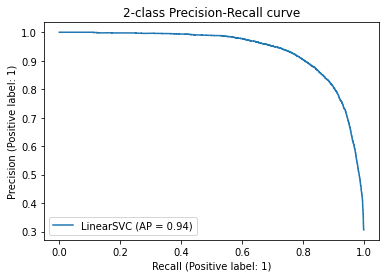

In [44]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="LinearSVC"
)

_ = display.ax_.set_title("2-class Precision-Recall curve")

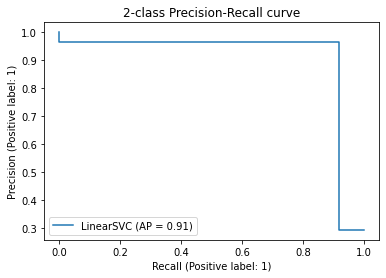

In [46]:
#y_score = clf.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")